In [14]:
def allInOne(path):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def filterArraysToShortest(arr1, arr1Pos, arr2, arr2Pos):
        both_pos = np.logical_and(arr1Pos, arr2Pos)
        arr1Filt = arr1[both_pos] 
        arr2Filt = arr2[both_pos] 
    
        return arr1Filt, arr2Filt
    
    
    def filterArraysToShortest2(arr1, arr1Pos, arr2, arr2Pos):
        if np.count_nonzero(arr1Pos) < np.count_nonzero(arr2Pos):
            arr1Filt = arr1[arr1Pos] 
            arr2Filt = arr2[arr1Pos] 
        else:
            arr1Filt = arr1[arr2Pos] 
            arr2Filt = arr2[arr2Pos] 
            
        return arr1Filt, arr2Filt
    
    df = pd.read_csv(path)
    display(df.head(5))
    
    reps = df['rep'].to_numpy()
    hopsRanked = df['hopsRanked'].to_numpy()
    hopsUnranked = df['hopsUnranked'].to_numpy()
    hopsRankedOne = df['hopsRankedOne'].to_numpy()
    hopsPath = df['hopsPath'].to_numpy()

    hopsRankedPositive = hopsRanked > -1
    hopsUnrankedPositive = hopsUnranked > -1
    hopsRankedOnePositive = hopsRankedOne > -1
    hopsPathPositive = hopsPath > -1
    
    total = len(df.index)

    successesRanked = np.count_nonzero(hopsRanked > -1)
    successesRankedOne = np.count_nonzero(hopsRankedOne > -1)
    successesUnranked = np.count_nonzero(hopsUnranked > -1)
    successesPath = np.count_nonzero(hopsPath > -1)

    
    
    percentPaths = (successesPath / total) * 100
    percentOne = (successesRankedOne / total) * 100
    percentRanked = (successesRanked / total) * 100
    
    print("Resilience Paths: {}%".format(percentPaths))
    print("Resilience One Tree: {}%".format(percentOne))
    print("Resilience Trees: {}%".format(percentRanked))
    #print("Resilience Unranked: {}%".format((successesUnranked / total) * 100))

  
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)   
    
    diff = np.subtract(hopsPathFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5)
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Trees beat paths in {} runs".format(higherZero))
    print("Paths beat trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))
    

    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   

    diff = np.subtract(hopsPathFiltered,hopsRankedOneFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("One Tree beat paths in {} runs".format(higherZero))
    print("Paths beat one tree in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsRankedOneFiltered,hopsRankedFiltered = filterArraysToShortest(hopsRankedOne, hopsRankedOnePositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsRankedOneFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Multiple Trees beat One Tree in {} runs".format(higherZero))
    print("One Tree beat  multiple trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsUnrankedFiltered,hopsRankedFiltered = filterArraysToShortest(hopsUnranked, hopsUnrankedPositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsUnrankedFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Ranked Trees beat Unranked Tree in {} runs".format(higherZero))
    print("Unranked Tree beat ranked trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))
    
    return percentPaths, percentOne, percentRanked

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,2,1,clustered,0.3;-0.3,4,4,4,0,4,4,0,4,4,0,2,edgeCount
1,999,25,56,graphml/AttMpls.graphml,3,2,clustered,0.3;-0.3,5,8,3,2,0,3,0,3,3,0,0,edgeCount
2,998,25,56,graphml/AttMpls.graphml,2,1,clustered,0.3;-0.3,4,4,3,1,0,3,0,3,3,0,0,edgeCount
3,997,25,56,graphml/AttMpls.graphml,4,3,clustered,0.3;-0.3,2,2,2,0,0,3,1,3,2,1,0,edgeCount
4,996,25,56,graphml/AttMpls.graphml,2,1,clustered,0.3;-0.3,3,3,3,0,0,3,0,3,3,0,0,edgeCount


Resilience Paths: 99.7%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


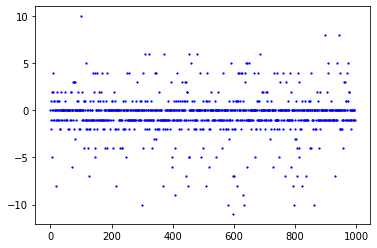

Trees beat paths in 163 runs
Paths beat trees in 419 runs
Both performed equally good in 415 runs


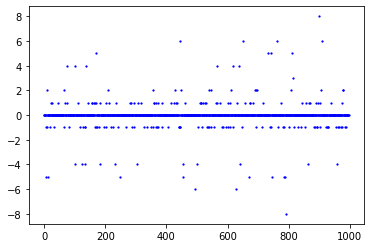

One Tree beat paths in 90 runs
Paths beat one tree in 99 runs
Both performed equally good in 808 runs


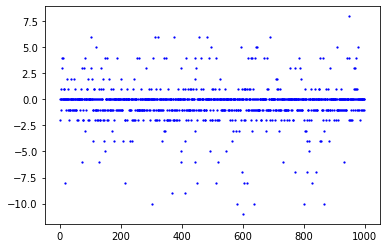

Multiple Trees beat One Tree in 137 runs
One Tree beat  multiple trees in 377 runs
Both performed equally good in 486 runs


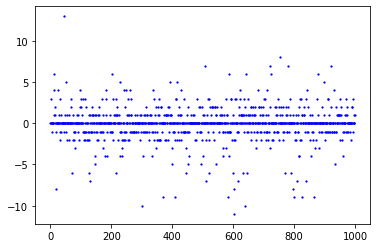

Ranked Trees beat Unranked Tree in 258 runs
Unranked Tree beat ranked trees in 274 runs
Both performed equally good in 468 runs


In [15]:
#0.3
rPaths03, rOne03, rMult03 = allInOne('CSVs/curve/trees-2021-08-08_17-27-47-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,2,1,clustered,0.4;-0.3,3,3,3,0,0,3,0,3,3,0,0,edgeCount
1,999,25,56,graphml/AttMpls.graphml,2,1,clustered,0.4;-0.3,5,5,5,0,2,5,0,5,5,0,2,edgeCount
2,998,25,56,graphml/AttMpls.graphml,4,3,clustered,0.4;-0.3,2,2,2,0,0,2,0,2,2,0,0,edgeCount
3,997,25,56,graphml/AttMpls.graphml,4,3,clustered,0.4;-0.3,4,5,3,1,4,3,0,3,3,0,4,edgeCount
4,996,25,56,graphml/AttMpls.graphml,2,1,clustered,0.4;-0.3,3,3,3,0,0,3,0,3,3,0,0,edgeCount


Resilience Paths: 97.3%
Resilience One Tree: 99.6%
Resilience Trees: 100.0%


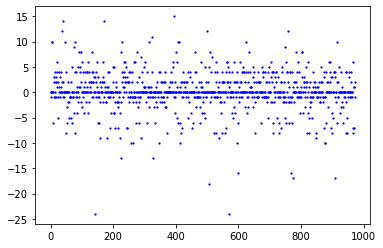

Trees beat paths in 337 runs
Paths beat trees in 323 runs
Both performed equally good in 313 runs


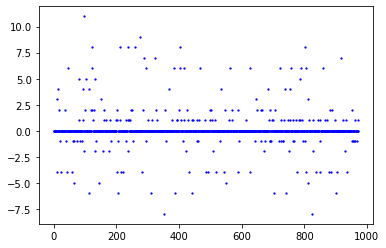

One Tree beat paths in 125 runs
Paths beat one tree in 87 runs
Both performed equally good in 761 runs


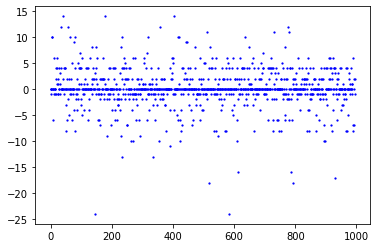

Multiple Trees beat One Tree in 309 runs
One Tree beat  multiple trees in 304 runs
Both performed equally good in 383 runs


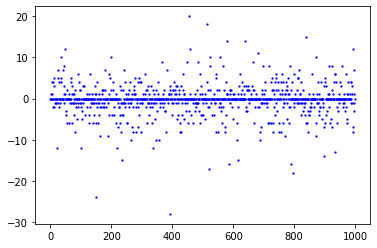

Ranked Trees beat Unranked Tree in 260 runs
Unranked Tree beat ranked trees in 302 runs
Both performed equally good in 438 runs


In [16]:
#0.4
rPaths04, rOne04, rMult04 = allInOne('CSVs/curve/trees-2021-08-08_17-28-23-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,3,2,clustered,0.5;-0.3,7,3,3,4,0,3,0,3,3,0,0,edgeCount
1,999,25,56,graphml/AttMpls.graphml,3,2,clustered,0.5;-0.3,5,6,3,2,12,-1,-4,5,5,2,4,edgeCount
2,998,25,56,graphml/AttMpls.graphml,2,1,clustered,0.5;-0.3,9,8,3,6,14,7,4,7,7,4,10,edgeCount
3,997,25,56,graphml/AttMpls.graphml,5,4,clustered,0.5;-0.3,9,5,3,6,0,9,6,7,7,4,0,edgeCount
4,996,25,56,graphml/AttMpls.graphml,2,1,clustered,0.5;-0.3,3,3,3,0,2,3,0,3,3,0,2,edgeCount


Resilience Paths: 81.87565858798736%
Resilience One Tree: 91.6754478398314%
Resilience Trees: 96.4172813487882%


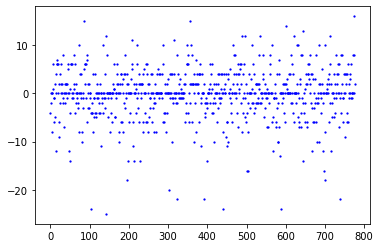

Trees beat paths in 288 runs
Paths beat trees in 296 runs
Both performed equally good in 193 runs


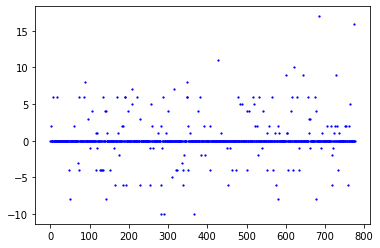

One Tree beat paths in 90 runs
Paths beat one tree in 62 runs
Both performed equally good in 625 runs


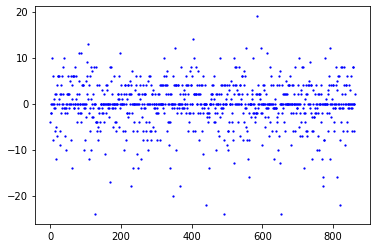

Multiple Trees beat One Tree in 315 runs
One Tree beat  multiple trees in 316 runs
Both performed equally good in 232 runs


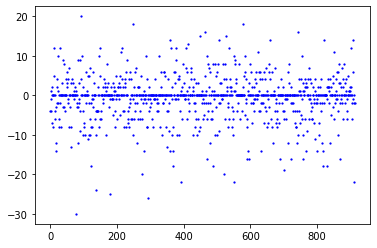

Ranked Trees beat Unranked Tree in 261 runs
Unranked Tree beat ranked trees in 338 runs
Both performed equally good in 316 runs


In [17]:
#0.5
rPaths05, rOne05, rMult05 = allInOne('CSVs/curve/trees-2021-08-08_17-28-53-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,17,9,4,13,0,-1,-5,-1,-1,-5,0,edgeCount
1,999,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,11,20,4,7,0,13,9,13,19,9,0,edgeCount
2,998,25,56,graphml/AttMpls.graphml,2,1,clustered,0.6;-0.3,6,6,4,2,0,8,4,8,8,4,0,edgeCount
3,997,25,56,graphml/AttMpls.graphml,3,2,clustered,0.6;-0.3,13,8,4,9,4,11,7,11,23,7,4,edgeCount
4,996,25,56,graphml/AttMpls.graphml,4,3,clustered,0.6;-0.3,8,2,2,6,0,2,0,6,2,4,0,edgeCount


Resilience Paths: 63.61556064073226%
Resilience One Tree: 79.51945080091534%
Resilience Trees: 90.38901601830663%


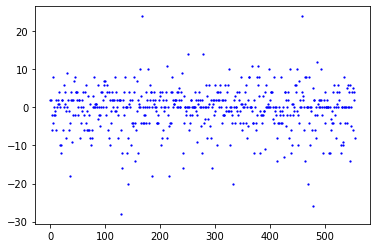

Trees beat paths in 226 runs
Paths beat trees in 215 runs
Both performed equally good in 115 runs


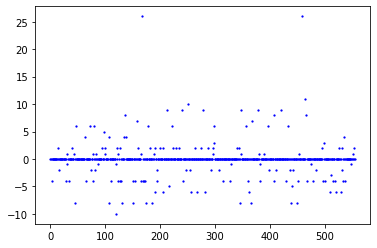

One Tree beat paths in 70 runs
Paths beat one tree in 76 runs
Both performed equally good in 410 runs


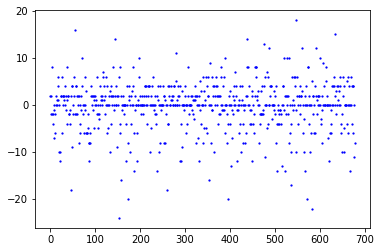

Multiple Trees beat One Tree in 281 runs
One Tree beat  multiple trees in 228 runs
Both performed equally good in 170 runs


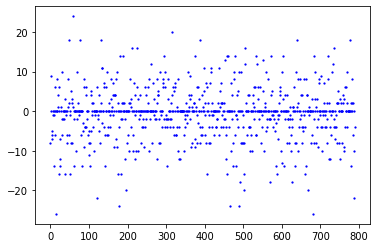

Ranked Trees beat Unranked Tree in 234 runs
Unranked Tree beat ranked trees in 307 runs
Both performed equally good in 249 runs


In [18]:
#0.6
rPaths06, rOne06, rMult06 = allInOne('CSVs/curve/trees-2021-08-08_17-29-09-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,25,56,graphml/AttMpls.graphml,2,1,clustered,0.7;-0.3,25,23,5,20,2,-1,-6,-1,-1,-6,2,edgeCount
1,998,25,56,graphml/AttMpls.graphml,2,1,clustered,0.7;-0.3,10,6,4,6,0,-1,-5,-1,-1,-5,0,edgeCount
2,996,25,56,graphml/AttMpls.graphml,2,1,clustered,0.7;-0.3,4,4,4,0,0,4,0,4,4,0,0,edgeCount
3,990,25,56,graphml/AttMpls.graphml,2,1,clustered,0.7;-0.3,3,3,3,0,0,5,2,3,5,0,0,edgeCount
4,989,25,56,graphml/AttMpls.graphml,5,4,clustered,0.7;-0.3,4,4,4,0,0,12,8,4,4,0,0,edgeCount


Resilience Paths: 36.7479674796748%
Resilience One Tree: 47.479674796747965%
Resilience Trees: 61.78861788617886%


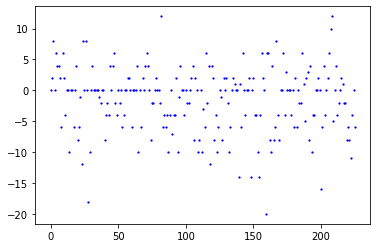

Trees beat paths in 64 runs
Paths beat trees in 100 runs
Both performed equally good in 62 runs


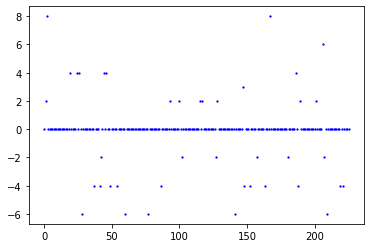

One Tree beat paths in 18 runs
Paths beat one tree in 22 runs
Both performed equally good in 186 runs


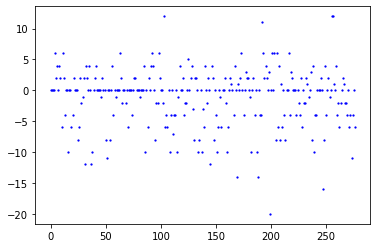

Multiple Trees beat One Tree in 79 runs
One Tree beat  multiple trees in 105 runs
Both performed equally good in 93 runs


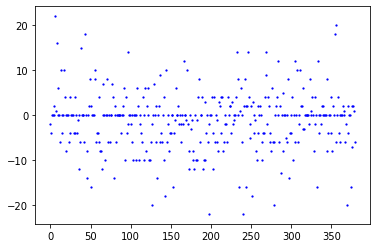

Ranked Trees beat Unranked Tree in 110 runs
Unranked Tree beat ranked trees in 159 runs
Both performed equally good in 111 runs


In [19]:
#0.7
rPaths07, rOne07, rMult07 = allInOne('CSVs/curve/trees-2021-08-08_17-29-27-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,995,25,56,graphml/AttMpls.graphml,2,1,clustered,0.8;-0.3,-1,-1,8,-9,4,-1,-9,-1,-1,-9,4,edgeCount
1,992,25,56,graphml/AttMpls.graphml,2,1,clustered,0.8;-0.3,17,11,5,12,0,5,0,5,5,0,0,edgeCount
2,988,25,56,graphml/AttMpls.graphml,4,3,clustered,0.8;-0.3,6,6,4,2,8,-1,-5,6,12,2,4,edgeCount
3,987,25,56,graphml/AttMpls.graphml,4,3,clustered,0.8;-0.3,9,3,3,6,0,3,0,3,3,0,0,edgeCount
4,986,25,56,graphml/AttMpls.graphml,2,1,clustered,0.8;-0.3,4,12,4,0,2,4,0,4,4,0,2,edgeCount


Resilience Paths: 27.906976744186046%
Resilience One Tree: 36.27906976744186%
Resilience Trees: 40.46511627906977%


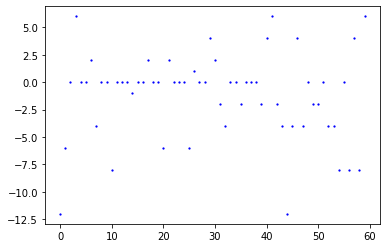

Trees beat paths in 12 runs
Paths beat trees in 23 runs
Both performed equally good in 25 runs


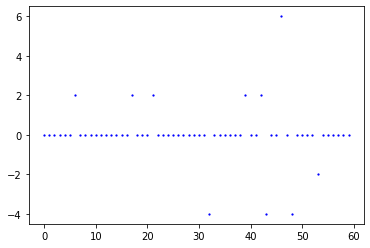

One Tree beat paths in 6 runs
Paths beat one tree in 4 runs
Both performed equally good in 50 runs


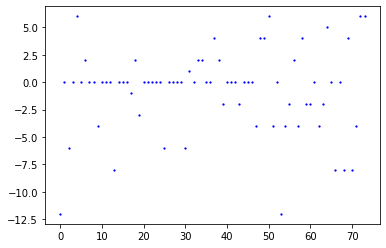

Multiple Trees beat One Tree in 17 runs
One Tree beat  multiple trees in 24 runs
Both performed equally good in 33 runs


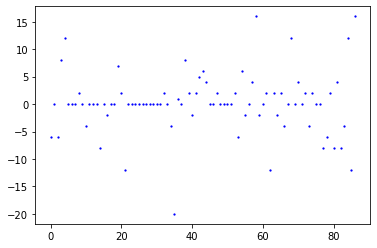

Ranked Trees beat Unranked Tree in 29 runs
Unranked Tree beat ranked trees in 22 runs
Both performed equally good in 36 runs


In [20]:
#0.8
rPaths08, rOne08, rMult08 = allInOne('CSVs/curve/trees-2021-08-08_17-29-46-n25.csv')


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,988,25,56,graphml/AttMpls.graphml,2,1,clustered,0.9;-0.3,8,4,4,4,0,4,0,4,4,0,0,edgeCount
1,974,25,56,graphml/AttMpls.graphml,2,1,clustered,0.9;-0.3,3,3,3,0,0,3,0,3,3,0,0,edgeCount
2,973,25,56,graphml/AttMpls.graphml,5,4,clustered,0.9;-0.3,-1,-1,7,-8,0,-1,-8,-1,-1,-8,0,edgeCount
3,971,25,56,graphml/AttMpls.graphml,3,2,clustered,0.9;-0.3,2,2,2,0,10,2,0,2,2,0,4,edgeCount
4,963,25,56,graphml/AttMpls.graphml,3,2,clustered,0.9;-0.3,-1,-1,7,-8,0,-1,-8,-1,-1,-8,0,edgeCount


Resilience Paths: 27.397260273972602%
Resilience One Tree: 31.506849315068493%
Resilience Trees: 35.61643835616438%


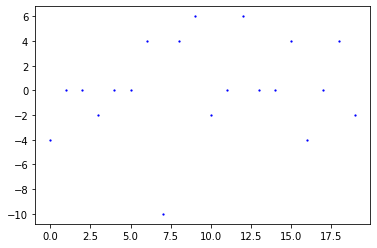

Trees beat paths in 6 runs
Paths beat trees in 6 runs
Both performed equally good in 8 runs


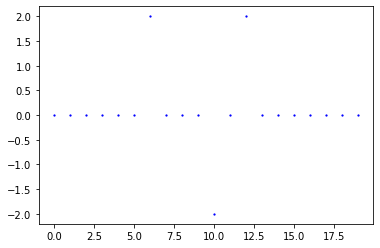

One Tree beat paths in 2 runs
Paths beat one tree in 1 runs
Both performed equally good in 17 runs


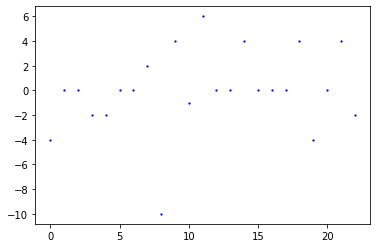

Multiple Trees beat One Tree in 6 runs
One Tree beat  multiple trees in 7 runs
Both performed equally good in 10 runs


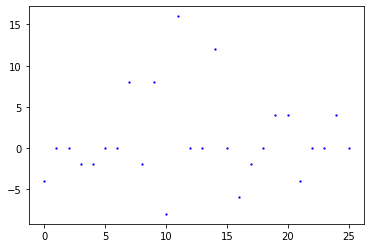

Ranked Trees beat Unranked Tree in 7 runs
Unranked Tree beat ranked trees in 8 runs
Both performed equally good in 11 runs


In [21]:
#0.9
rPaths09, rOne09, rMult09 = allInOne('CSVs/curve/trees-2021-08-08_17-29-59-n25.csv')


In [22]:
xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
yValsPaths = [rPaths03, rPaths04, rPaths05, rPaths06, rPaths07, rPaths08, rPaths09]
yValsOne = [rOne03, rOne04, rOne05, rOne06, rOne07, rOne08, rOne09]
yValsMult = [rMult03, rMult04, rMult05, rMult06, rMult07, rMult08, rMult09]

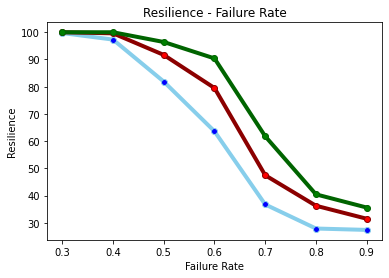

In [29]:
import matplotlib.pyplot as plt

plt.plot(xVals, yValsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.plot(xVals, yValsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
plt.plot(xVals, yValsMult, marker='o', markerfacecolor='green', markersize=6, color='darkgreen', linewidth=4)
plt.title('Resilience - Failure Rate')
plt.xlabel('Failure Rate')
plt.ylabel('Resilience')
plt.show()

In [ ]:
#do for adversarial and random model too

In [ ]:
#gutes n und p finden in literatur

In [ ]:
#do relative drop-off!